## Задание 1.

Посчитайте частоты для 5-грамм в корпусе lenta.txt. двумя способами:  
1) lenta.txt -> sent_tokenize (russian) -> word_tokenize -> ngrammer  
2) lenta.txt -> word_tokene(preserve_line=True) - ngrammer  
    
Проанализируйте топ-20 самых частотных нграмм и проверьте есть ли различия? 

In [21]:
# подгружаем всё нужное
import re
import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

#превращаем стоп-слова в множество
russian_stopwords = set(stopwords.words('russian'))

#достаем из широких штанин корпус
corpus = open('data/lenta.txt',encoding="utf-8").read()


#токенизируем
sentences = sent_tokenize(corpus, language='russian')
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
tokenized_sentences = [[token.lower() for token in sentence if not re.match(r'\W+', token)] 
                       for sentence in tokenized_sentences]

#н-граммер
def ngrammer(tokens, n=5, stops=set()):
    ngrams = []
    tokens = [token for token in tokens if token not in stops]
    for i in range(0,len(tokens)-n+1):
        ngrams.append(' '.join(tokens[i:i+n]))
    return ngrams

ngram_counts = Counter()
for sentence in tokenized_sentences:
    ngram_counts.update(ngrammer(sentence, 5, russian_stopwords))

ngram_counts.most_common(20)



[('объединенной группировки войск северном кавказе', 83),
 ('сообщает риа новости ссылкой пресс-службу', 57),
 ('обязанности президента россии владимир путин', 47),
 ('группировки федеральных сил северном кавказе', 37),
 ('помощник президента россии сергей ястржембский', 35),
 ('делам печати телерадиовещания средств массовых', 31),
 ('объединенной группировки федеральных сил северном', 31),
 ('печати телерадиовещания средств массовых коммуникаций', 30),
 ('штабе объединенной группировки федеральных сил', 25),
 ('министр иностранных дел россии игорь', 24),
 ('первый заместитель начальника генерального штаба', 23),
 ('сообщает риа новости ссылкой источники', 23),
 ('объединенной группировкой войск северном кавказе', 23),
 ('иностранных дел россии игорь иванов', 23),
 ('прямом эфире радиостанции эхо москвы', 20),
 ('главного управления борьбе организованной преступностью', 20),
 ('начальника генерального штаба вооруженных сил', 20),
 ('заместитель начальника генштаба вооруженных сил', 20)

In [22]:
import re
import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter


russian_stopwords = set(stopwords.words('russian'))


corpus = open('data/lenta.txt', encoding="utf-8").read()

# получаем море токенов, которые (внезапно) сломают нам счетчик
tokenized_words = word_tokenize(corpus, language='russian', preserve_line=True)


tokenized_words = [token.lower() for token in tokenized_words if not re.match(r'\W+', token)]

#н-граммер
def ngrammer(tokens, n=5):
    ngrams = []
    tokens = [token for token in tokens if token not in russian_stopwords]
    for i in range(0,len(tokens)-n+1):
        ngrams.append(' '.join(tokens[i:i+n]))
    return ngrams
# почему-то здесь у меня не получилось отфильровать на стоп-слова через stops=set(), 
# методом научного тыка отфильтровалось просто через russian_stopwords


ngram_counts = Counter(ngrammer(tokenized_words, 5))

ngram_counts.most_common(20)

[('сообщает риа новости ссылкой пресс-службу', 57),
 ('объединенной группировки войск северном кавказе', 56),
 ('обязанности президента россии владимир путин', 46),
 ('делам печати телерадиовещания средств массовых', 31),
 ('объединенной группировки федеральных сил северном', 31),
 ('печати телерадиовещания средств массовых коммуникаций', 29),
 ('объединенной группировки войск северном кавказе.', 27),
 ('министр иностранных дел россии игорь', 24),
 ('штабе объединенной группировки федеральных сил', 24),
 ('первый заместитель начальника генерального штаба', 23),
 ('сообщает риа новости ссылкой источники', 23),
 ('объединенной группировкой войск северном кавказе', 23),
 ('помощник президента россии сергей ястржембский', 21),
 ('прямом эфире радиостанции эхо москвы', 20),
 ('начальника генерального штаба вооруженных сил', 20),
 ('группировки федеральных сил северном кавказе', 20),
 ('заместитель начальника генштаба вооруженных сил', 20),
 ('сообщает федеральное агентство новостей ссылкой'

Проанализировав полученные списки, я пришла к выводу, что второй способ срезал частотность, т.е. повысил точность, но не сказать чтобы сильно

## Задание 2.

Найдите какую-то инетересную (по вашему мнению) закономерность на https://books.google.com/ngrams/ для русского языка (с 1990 по 2022)

Вставьте сюда скриншот

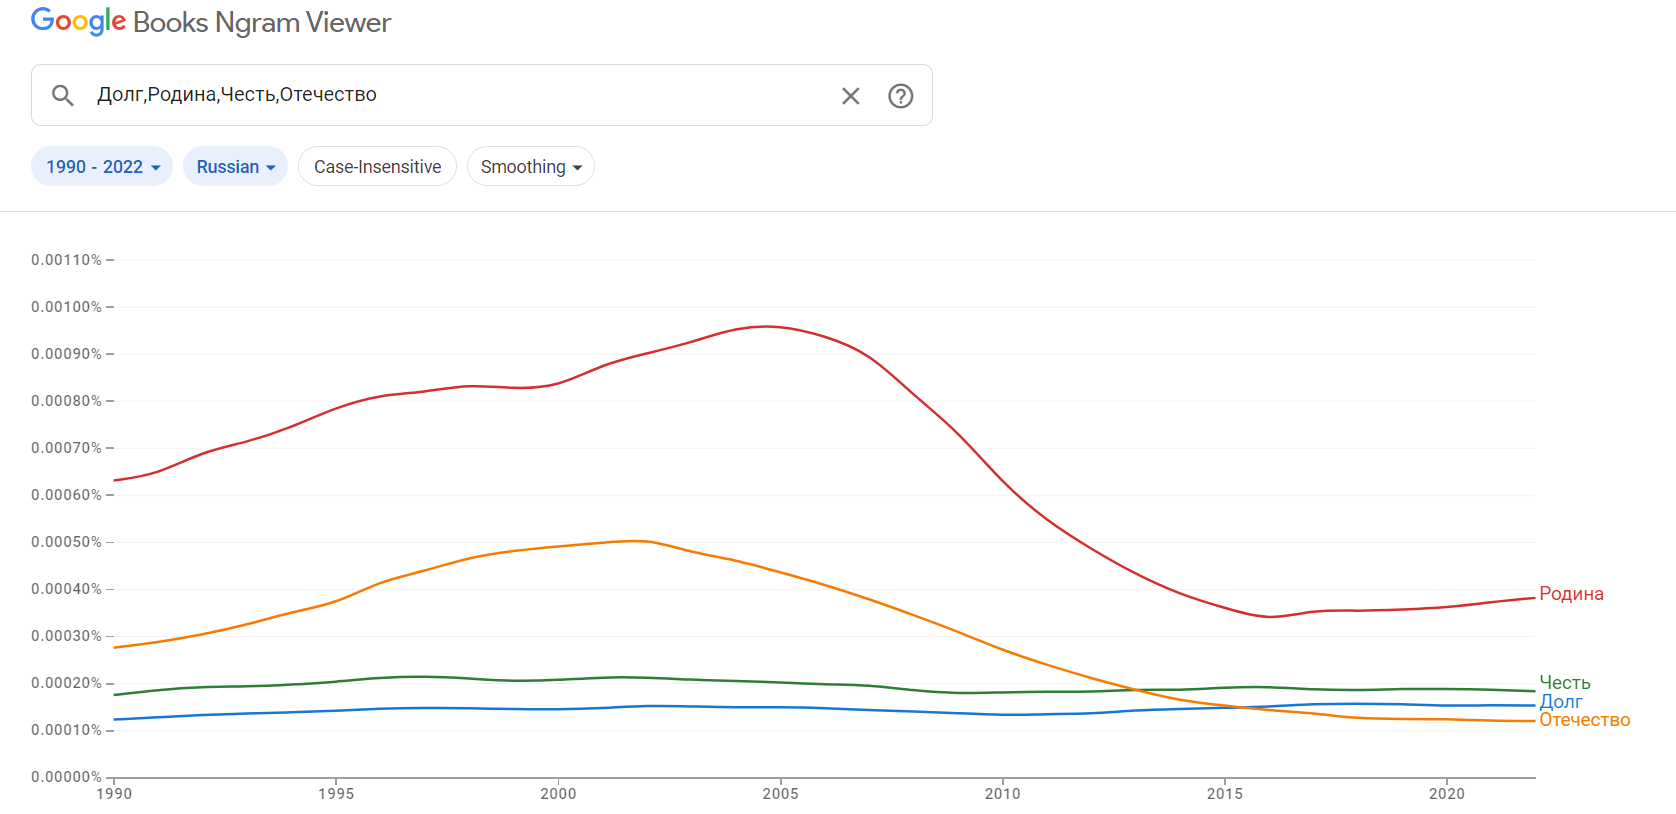

In [23]:
from IPython.display import Image
Image('Zakonomernost.png')



Чем ближе к современности мы приближаемся, тем реже поднимаются патриотические темы. Тем не менее, пик упоминания родины и отечества приходится на нулевые...

## Заданиe 3

Когда мы разбирали PMI мы использовали такую функцию:

In [24]:
from collections import Counter
from nltk import bigrams, word_tokenize
import math


corpus = open('data/lenta.txt', encoding="utf-8").read()
tokens = word_tokenize(corpus.lower())


def scorer_simple(word_count_a, word_count_b, bigram_count, *args):
    try:
        score = bigram_count/((word_count_a+word_count_b))
    except ZeroDivisionError:
        return 0
    return score

def ngrammer(tokens, n=2, stops=set()):
    ngrams = []
    tokens = [token for token in tokens if token not in stops]
    for i in range(0,len(tokens)-n+1):
        ngrams.append(' '.join(tokens[i:i+n]))
    return ngrams

def collect_stats(corpus, stops):
    ## соберем статистики для отдельных слов
    ## и биграммов
    
    unigrams = Counter()
    bigrams = Counter()
    
    for sent in corpus:
        unigrams.update(sent)
        bigrams.update(ngrammer(sent, 2, stops))
    
    return unigrams, bigrams

def score_bigrams(unigrams, bigrams, scorer, threshold=-100000, min_count=0):
    ## посчитаем метрику для каждого нграмма
    bigram2score = Counter()
    
    for bigram in bigrams:
        word_a, word_b = bigram.split()
        score = scorer(unigrams[word_a], unigrams[word_b], bigrams[bigram], min_count)
        
        ## если метрика выше порога, добавляем в словарик
        if score > threshold:
            bigram2score[bigram] = score
    
    return bigram2score


unigrams, bigrams = collect_stats(tokenized_sentences, russian_stopwords)

bigram2score = score_bigrams(unigrams, bigrams, scorer_simple, min_count=20)

bigram2score.most_common(10)


[('сопоцкина друскеник', 0.5),
 ('неприятель приблизившись', 0.5),
 ('саноку обстреливалась', 0.5),
 ('м.ю лермонтова', 0.5),
 ('австрийский аэроплан', 0.5),
 ('показывался аэроплан-птица', 0.5),
 ('das ist', 0.5),
 ('ist nesteroff', 0.5),
 ('песнь нестерове', 0.5),
 ('могучий унесся', 0.5)]

Но если вы посмотрите на определение в википедии, то увидите, что формула немного другая ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/094243d23c19d2d032f6bb26c4dc4f47d98d32f8)

Перепишите функцию, чтобы она точно соответствовала этому определению. Расчитайте PMI для всех биграммов также как мы делали в семинаре с помощью функции score_bigrams используя изначальный scorer и обновленный. Посмотрите есть ли разница в топ-10 биграммов. Подумайте почему результаты совпадают/отличаются?

*Подсказка: для вероятностей можно поделить на количество слов в корпусе

In [25]:
from collections import Counter 
from nltk import bigrams, word_tokenize 
import math 
 
 
corpus = open('data/lenta.txt', encoding="utf-8").read() 
tokens = word_tokenize(corpus.lower()) 
 
total_words = len(tokens) 
 
def collect_stats(corpus, stops): 
    ## соберем статистики для отдельных слов 
    ## и биграммов 
     
    unigrams = Counter() 
    bigrams = Counter() 
     
    for sent in corpus: 
        unigrams.update(sent) 
        bigrams.update(ngrammer(sent, 2, stops)) 
     
    return unigrams, bigrams 
 
def pmi_scorer(x, y, unigrams, bigrams, total_words): 
    p_x = unigrams[x] / total_words 
    p_y = unigrams[y] / total_words 
    p_xy = bigrams[(x, y)] / total_words 
     
    if p_xy > 0: 
        return math.log2(p_xy / (p_x * p_y)) 
    else: 
        return 0   
 
def ngrammer(tokens, n=2, stops=set()):
    ngrams = []
    tokens = [token for token in tokens if token not in stops]
    for i in range(0,len(tokens)-n+1):
        ngrams.append(tuple(tokens[i:i+n]))
    return ngrams

def score_bigrams(unigrams, bigrams, scorer, threshold=-100000, min_count=0): 
    bigram2score = Counter() 
    len_vocab = len(unigrams)
    
    for bigram in bigrams:
        word_a, word_b = bigram
        # Проверка на минимальную частоту биграммы
        score = scorer(word_a, word_b, unigrams, bigrams, len_vocab)
        #score = scorer(unigrams[word_a], unigrams[word_b], bigrams[bigram], len_vocab, min_count,)
        if score > threshold:
            bigram2score[bigram] = score
     
    return bigram2score
 
unigrams, bigrams = collect_stats(tokenized_sentences, russian_stopwords) 
 
bigram2score = score_bigrams(unigrams, bigrams, pmi_scorer, min_count=20) 
 
bigram2score.most_common(10)


[(('сопоцкина', 'друскеник'), 16.968914240246885),
 (('неприятель', 'приблизившись'), 16.968914240246885),
 (('саноку', 'обстреливалась'), 16.968914240246885),
 (('м.ю', 'лермонтова'), 16.968914240246885),
 (('австрийский', 'аэроплан'), 16.968914240246885),
 (('показывался', 'аэроплан-птица'), 16.968914240246885),
 (('das', 'ist'), 16.968914240246885),
 (('ist', 'nesteroff'), 16.968914240246885),
 (('песнь', 'нестерове'), 16.968914240246885),
 (('могучий', 'унесся'), 16.968914240246885)]

Первый способ не учитывает вероятности или взаимозависимость между словами, а просто нормализует частоту биграммы относительно частот отдельных слов. Второй же способ выявляет насколько слова встречаются вместе относительно того, как часто они могли бы встречаться. Кроме того, во второй формуле есть логарифмы, в связи с чем числовые значения будут гораздо больше во втором случае.

## Задание 4*

Обновите функцию получившуюся в предыдущем задании так, чтобы вместо произведения/деления вероятностей использовались сложение и вычитание логирифмов. 

## Задание 5

Исследуйте gensim.models.Phrases. Проверьте сколько дефолтных scoring функций есть в этом классе. Попробуйте все доступные по умолчанию scoring функции и попробуйте настраивать для них значение threshold и min_count. Попробуйте сделать так, чтобы собиралось как можно больше нграммов. Попробуйте строить последовательность gensim.models.Phrases, чтобы строить более длинные нграммы

In [26]:
import gensim
import re
import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from gensim.models.phrases import Phrases

phrases_model = Phrases(tokenized_sentences, 
                           min_count=1, 
                           threshold=1.,
                           )
all_methods = dir(phrases_model)


help(phrases_model.scoring)


Help on function original_scorer in module gensim.models.phrases:

original_scorer(worda_count, wordb_count, bigram_count, len_vocab, min_count, corpus_word_count)
    Bigram scoring function, based on the original `Mikolov, et. al: "Distributed Representations
    of Words and Phrases and their Compositionality" <https://arxiv.org/abs/1310.4546>`_.

    Parameters
    ----------
    worda_count : int
        Number of occurrences for first word.
    wordb_count : int
        Number of occurrences for second word.
    bigram_count : int
        Number of co-occurrences for phrase "worda_wordb".
    len_vocab : int
        Size of vocabulary.
    min_count: int
        Minimum collocation count threshold.
    corpus_word_count : int
        Not used in this particular scoring technique.

    Returns
    -------
    float
        Score for given phrase. Can be negative.

    Notes
    -----
    Formula: :math:`\frac{(bigram\_count - min\_count) * len\_vocab }{ (worda\_count * wordb\_coun

In [36]:

import gensim
import re
import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from gensim.models.phrases import Phrases

#превращаем стоп-слова в множество
russian_stopwords = set(stopwords.words('russian'))

#достаем из широких штанин корпус
corpus = open('data/lenta.txt',encoding="utf-8").read()


#токенизируем
sentences = sent_tokenize(corpus, language='russian')
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
tokenized_sentences = [[token.lower() for token in sentence if not re.match(r'\W+', token)] 
                       for sentence in tokenized_sentences]


#согласно документации, есть две дефолтные фнкции scoring - это default и npmi, причем для второй действует правило, что threshold должен находиться между -1 и 1
#значит именно этот метод будет собирать наибольшее кол-во нграмм
b_phrases = gensim.models.Phrases(tokenized_sentences, 
                           min_count=1, 
                           threshold=0.1,
                           scoring='npmi')

b_model = gensim.models.phrases.Phraser(b_phrases)
b_sent = [b_model[sentence] for sentence in tokenized_sentences]

t_phrases = gensim.models.Phrases(b_sent,  min_count=1, threshold=0.1, scoring='npmi')
t_model = gensim.models.phrases.Phraser(t_phrases)
t_sent = [t_model[sentence] for sentence in b_sent]

q_phrases = gensim.models.Phrases(t_sent,  min_count=1, threshold=0.1, scoring='npmi')
q_model = gensim.models.phrases.Phraser(q_phrases)
q_sent = [q_model[sentence] for sentence in t_sent]

p_phrases = gensim.models.Phrases(q_sent,  min_count=1, threshold=0.1, scoring='npmi')
p_model = gensim.models.phrases.Phraser(p_phrases)
p_sent = [p_model[sentence] for sentence in q_sent]

s_phrases = gensim.models.Phrases(p_sent,  min_count=1, threshold=0.1, scoring='npmi')
s_model = gensim.models.phrases.Phraser(s_phrases)
s_sent = [s_model[sentence] for sentence in p_sent]

s_sent




[['бои_у_сопоцкина_и', 'друскеник_закончились', 'отступлением_германцев'],
 ['неприятель_приблизившись',
  'с_севера_к_осовцу_начал_артиллерийскую_борьбу_с_крепостью'],
 ['в_артиллерийском_бою_принимают', 'участие_тяжелые_калибры'],
 ['с_раннего_утра_14_сентября_огонь', 'достиг_значительного_напряжения'],
 ['попытка_германской', 'пехоты_пробиться', 'ближе_к', 'крепости_отражена'],
 ['в_галиции_мы_заняли_дембицу'],
 ['большая_колонна_отступавшая_по',
  'шоссе_от_перемышля_к',
  'саноку_обстреливалась',
  'с_высот',
  'нашей_батареей',
  'и_бежала',
  'бросив_парки',
  'обоз_и',
  'автомобили'],
 ['вылазки_гарнизона_перемышля_остаются_безуспешными'],
 ['при_продолжающемся',
  'отступлении_австрийцев',
  'обнаруживается_полное',
  'перемешивание_их',
  'частей_захватываются_новые_партии',
  'пленных_орудия',
  'и_прочая_материальная_часть'],
 ['на_перевале_ужок_мы',
  'разбили_неприятельский',
  'отряд_взяли_его_артиллерию',
  'и_много_пленных_и_продолжая_преследовать_вступили_в_пределы_в